In [3]:
%matplotlib inline 
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections.abc import Iterable
import numpy as np

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

In [5]:
def isIterable(x):
    if isinstance(x, Iterable):
        return True
    else:
        return False


def allToList(r):
    i=0
    for x in r:
        if not isIterable(x):
            r[i] = [x]
        i+=1
    return r    


In [6]:
def to_df():
    df = pd.read_csv("cleaned_chess_dataset.csv")
    return df

In [7]:

def TopOpeningsByCount(top):
    df = to_df()
    countByOpening = df.groupby("opening_name")["id"].count()
    countByOpening.index = list([x.split()[0] for x in countByOpening.index])
    r = allToList([countByOpening.loc[x] for x in pd.unique(countByOpening.index)])
    idx = pd.unique(countByOpening.index)
    
    countByOpening = pd.Series([sum(l) for l in r],index=idx)
    countByOpening.sort_values(ascending=False,inplace=True)
    
    if top == -1:
        return countByOpening
    else:
        countByOpening = countByOpening[:top]
    return countByOpening


In [8]:
def TopByPercent(top):
    openings = TopOpeningsByCount(-1)
    totalGames = openings.sum()
    
    opening_percents  = openings.apply(lambda x: x/totalGames)
    if top == -1:
        return opening_percents
    else:    
        return opening_percents[:top]

In [9]:
def plot_totals(top):
    top10Openings = TopOpeningsByCount(top)
    ax = sns.barplot(x=top10Openings.index, y=top10Openings)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
    ax.set(xlabel='Opening name', ylabel='Total count')
    ax.set_title("top " + str(top) + " most played openings")
    plt.tight_layout()
    plt.show()

In [10]:
def plot_percents(top):
    topOpenings = TopByPercent(top)
    ax = sns.barplot(x=topOpenings.index, y=topOpenings)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
    ax.set(xlabel='Opening name', ylabel= '% of games played')
    ax.set_title("top " + str(top) + " most played openings")
    plt.tight_layout()
    plt.show()

In [11]:
def get_total_and_percent_by_name(name):
    name = name.split()[0]
    count = TopOpeningsByCount(-1)[name]
    percent = TopByPercent(-1)[name]
    return (count,percent)

In [12]:
def plot_opening_moves():
    df = pd.read_csv("archive/games.csv")
    df.dropna(how="any",inplace=True)
    df.drop(df.columns[list(range(1,12))],axis=1,inplace=True)
    df.drop(df.columns[list(range(2,3))],axis=1,inplace=True)
    df.drop(df.columns[3],axis=1,inplace=True)
    df.drop(df.columns[2],axis=1,inplace=True)


    
    df["moves"] = df["moves"].apply(lambda x: x.split()[0])
    df.rename(columns = {"moves":"first move"},inplace=True)
    df = df.groupby("first move").size()

    
    fig, axs = plt.subplots(ncols=2,figsize=(15,7))

    g = sns.barplot(y=df,x=df.index,ax=axs[0])
    g.set_title("Counts of opening moves with logaritmic scale")
    g.set_yscale("log")
    g2 = sns.barplot(y=df,x=df.index,ax=axs[1])
    g2.set_title("Counts of opening moves with standart scale")

    plt.show()

In [13]:
def avgTurnsOfTop(top):

    a = lambda x: x.split()[0]

    df2 = pd.read_csv("archive/games.csv")
    df2.drop(df2.columns.difference(['id','opening_name','turns']), 1, inplace=True)
    df2["opening_name"] = df2["opening_name"].apply(a)
    df2 = df2.groupby("opening_name")["turns"].mean()
 
    if top == -1:
        return df2
    else:
        return df2[:top]



   
    

def plotAvgTurns():
    df2 = TopOpeningsByCount(10)

    df = avgTurnsOfTop(-1)

    df.sort_values(ascending=False, inplace=True)

    df3 = df[df2.index]


    df4 = pd.read_csv("archive/games.csv")

    grandMean2 = np.mean(df4["turns"])

    grandMean = np.mean(df)

    fig, axs = plt.subplots(ncols=2,figsize=(15,9))
    
    g = sns.barplot(y=df,x=df.index,ax=axs[0])
    g.set_title("Average turns of all openings")
    g.set_xticks([])
    g.set_xlabel('')
    g.set_yticks(np.arange(0,135,5))

    g.axhline(grandMean)
    g.axhline(grandMean2,color="red")
    g.legend(["Average of averages","Average of all games"])
    leg = g.get_legend()
    leg.legendHandles[0].set_color('blue')
    leg.legendHandles[1].set_color('red')

    g2 = sns.barplot(y=df3,x=df3.index,ax=axs[1])
    g2.set_title("Average turns of top 10 most played openings")
    g2.set_xticklabels(g2.get_xticklabels(), rotation=40, ha="right", fontsize=10)
    g2.set_yticks(np.arange(0,65,5))

    plt.show()

In [14]:
def get_wins():
    df = pd.read_csv("archive/games.csv")
    w_wins = len(df[df["winner"]=="white"])
    b_wins = len(df[df["winner"]=="black"])
    draws = len(df[df["winner"]=="draw"])
    s = pd.Series([w_wins,b_wins,draws])

    df2 = df.groupby("victory_status")["victory_status"].count()

    # print(df2)
    # print(w_wins)
    # print(list(s))

    fig, axs = plt.subplots(ncols=2,figsize=(15,6))
    g = sns.barplot(y=s,x=s.index,ax=axs[0])
    g.set_xticklabels(["White wins","Black wins","Draw"])
    fig.set_size_inches(9, 6)
    g.set_title("Victory counts")
    g.set_ylabel('')
    g.set_yticks(np.arange(0,13000,1000))


    g2 = sns.barplot(y=df2,x=df2.index,ax=axs[1])
    g2.set_title("How the games ended")
    g2.set_ylabel('')
    g2.set_xlabel('')
    g2.set_yticks(np.arange(0,13000,1000))
  
    plt.show()




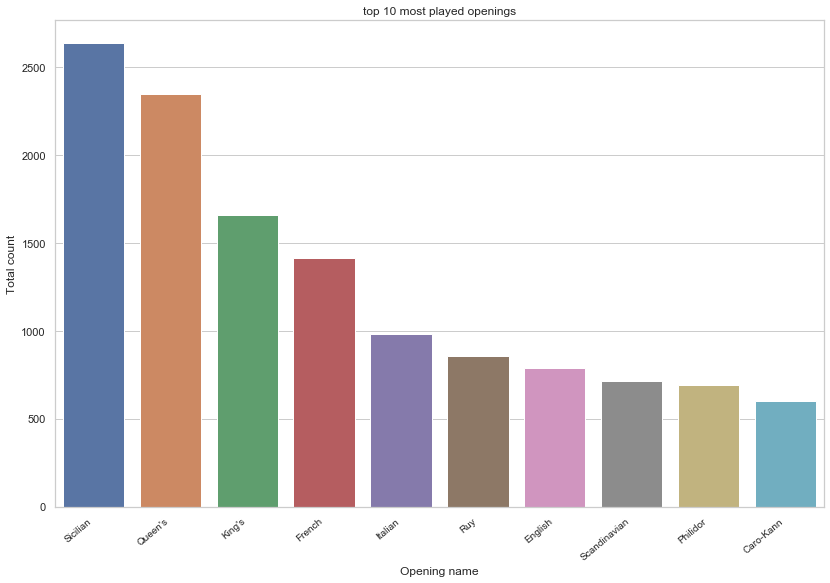

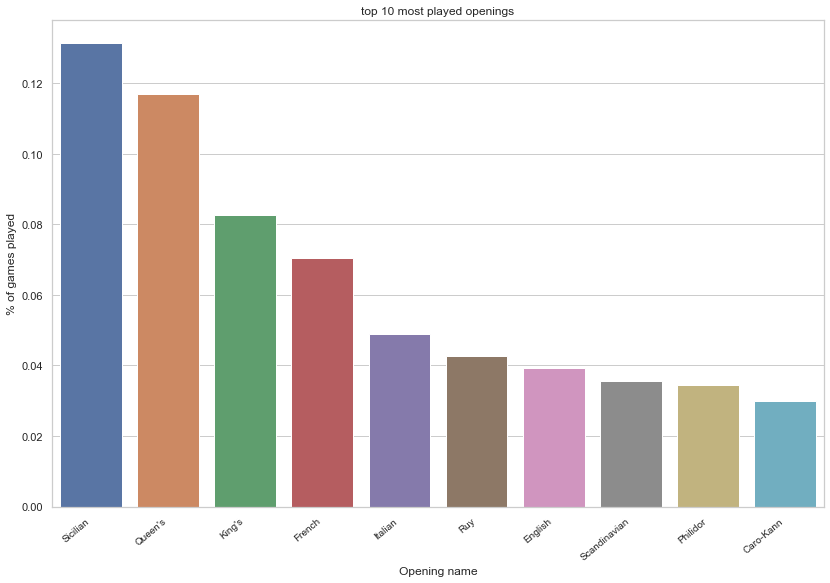

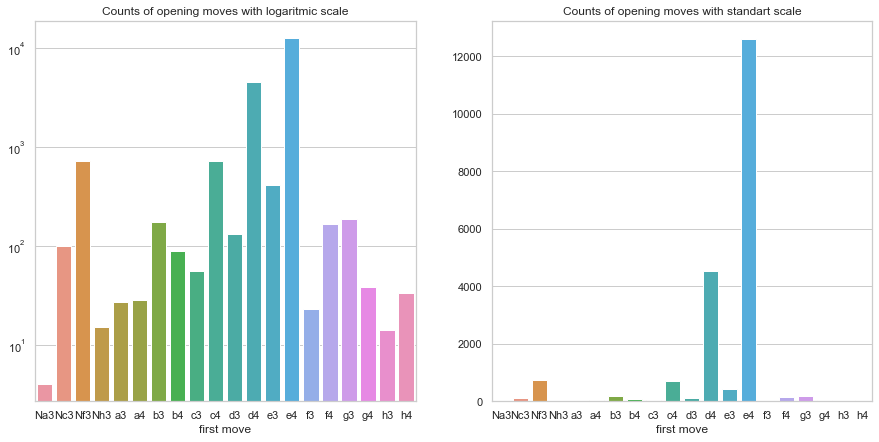

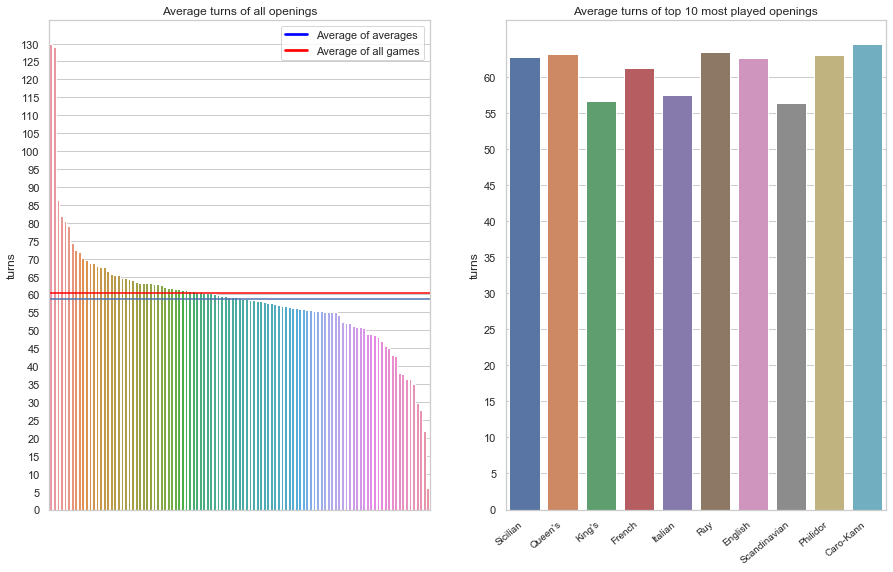

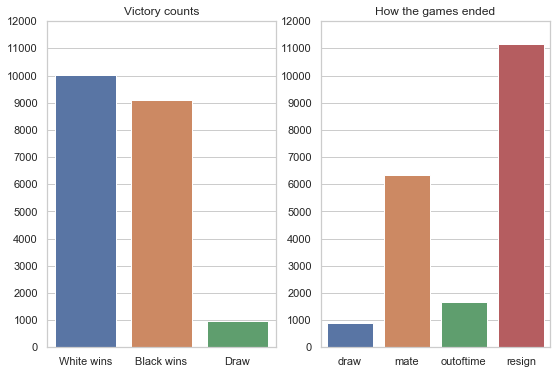

In [15]:
plot_totals(10)
plot_percents(10)
get_total_and_percent_by_name("Sicilian")
plot_opening_moves()
plotAvgTurns()
get_wins()